In [1]:
import os
from snudda.input_tuning.input_scaling import InputScaling
network_path = os.path.join("networks", "input_scaling")
input_scaling = InputScaling(network_path)

Different morphologies of the same neuron type might require different activation to reach comparable firing frequency. InputScaling simulates a network of a neuron type with different number of inputs, and different frequency to infer what level of input is needed.

Here we look at the input to ```neuron_types="fs"```.

During a simulation we can vary the input frequency, but not the number of inputs coupled to a neuron, so we use a set of ```num_replicas``` copies of each morphology, each receiving a different number of inputs from ```num_input_min``` to ```num_input_max``` of a given ```input_type``` (e.g. for striatum "cortical" or "thalamic"). 

A set of input frequencies are tested, specified by ```input_frequency_range```, and each of these frequencies is run for ```input_duration``` seconds. In this example we create a small example, but we recommend that use use a longer input duration (e.g. 10 seconds, or possibly more).

In [2]:
cellspec_path = os.path.join("..", "..", "snudda", "data", "neurons", "striatum")
input_scaling.setup_network(cellspec_path=cellspec_path, 
                            num_replicas=5,
                            neuron_types="fs")
input_scaling.setup_input(input_type="cortical",  # eg. "cortical" or "thalamic"
                          num_input_min=100,
                          num_input_max=1000,
                          input_duration=2.0,
                          input_frequency_range=[1.0, 2.0, 3.0])


Seeding with rand_seed=None
Random seed init to 3908920970
Random seed place to 3192225196
Random seed detect to 3808657722
Random seed prune to 277434210
Random seed input to 4142933799
Random seed simulate to 2237615958
Skipping neuron type lts
Skipping neuron type dspn
Skipping neuron type ispn
Skipping neuron type chin
Found 4 neurons in ../../snudda/data/neurons/striatum/fs
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e161205_FS1-mMTC180800A-IDB-v20190312/MTC180800A-IDB-cor-rep-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e180418_FS5-mMTC251001A-IDB-v20190301/MTC251001A-IDB-cor-rep-cache.pickle
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e161024_FS16-mDR-rat-Mar-13-08-1-536-R-v20190225/DR-rat-Mar-13-08-1-536-R-cor-rep-cache.pickle
Writing network config file to networks/input_sca

Gathering 3 - cortical
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e161205_FS1-mMTC180800A-IDB-v20190312/MTC180800A-IDB-cor-rep-cache.pickle
Trying to set nLocations = 289 (approx)
Generating 297 inputs for fs_1
Gathering 4 - cortical
Trying to set nLocations = 336 (approx)
Generating 331 inputs for fs_2
Gathering 5 - cortical
Found cache file: ../../snudda/data/neurons/striatum/fs/str-fs-e161024_FS16-mDR-rat-Mar-13-08-1-536-R-v20190225/DR-rat-Mar-13-08-1-536-R-cor-rep-cache.pickle
Trying to set nLocations = 384 (approx)
Generating 351 inputs for fs_3
Gathering 6 - cortical
Trying to set nLocations = 431 (approx)
Generating 432 inputs for fs_2
Gathering 7 - cortical
Trying to set nLocations = 478 (approx)
Generating 504 inputs for fs_3
Gathering 8 - cortical
Trying to set nLocations = 526 (approx)
Generating 548 inputs for fs_1
Gathering 9 - cortical
Trying to set nLocations = 573 (approx)
Generating 541 inputs for fs_0
Gathering 10 - cortical
Trying to set nLocation

In [3]:
from snudda.input import SnuddaInput
input_config = os.path.join(network_path, "input-config.json")
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
input_file = os.path.join(network_path, "input.hdf5")

si = SnuddaInput(input_config_file=input_scaling.input_config_file,
                 hdf5_network_file=input_scaling.network_file,
                 spike_data_filename=input_scaling.input_spikes_file,
                 time=input_scaling.max_time)
si.generate()

Time = 6.0
Using hdf5 version latest
Loading HDF5-file: networks/input_scaling/network-pruned-synapses.hdf5
Loading input configuration from networks/input_scaling/input_config.json
Reading neuron postions
Loading networks/input_scaling/network-neuron-positions.hdf5
No SlurmID set, using -1
Load done. 0.00633598497370258
Reading config file networks/input_scaling/network-config.json
Reading random see from config file: 4142933799
Running in serial
Running makePopulationUnitSpikeTrains
Running makeNeuronInputParallel
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specified for neuron type fs
No population spikes specifi

In [4]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
ls: cannot access '../../snudda/data/neurons/mechanisms/*.inc': No such file or directory
COBJS=''
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link mpicc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  bk_ch.lo bk_fs.lo bk_ms.lo ca_ch.lo cadyn_fs.lo cadyn_ms.lo cal12_ms.lo cal13_ms.lo cal_ch.lo caldyn_ms.lo can_fs.lo can_ms.lo cap_ch.lo caq_fs.lo caq_ms.lo car_fs.lo car_ms.lo cat32_ms.lo cat33_ms.lo concACh.lo concDAfile.lo concDA.lo hcn12_ch.lo hd_lts.lo im_lts.lo it_lts.lo kaf_fs.lo kaf_ms.lo kas_fs.lo kas_ms.lo kcnq_ch.lo kdrbca1_lts.lo kdr_fs.lo kdr_lts.lo kdr_m

For large runs, to simulate in parallel use:

```mpiexec -n 4 python3 ../../snudda/input_tuning/input_scaling.py simulate networks/input_scaling/```

Below we just run it in serial in the notebook.

In [5]:
input_scaling.simulate()

Using networkFile: networks/input_scaling/network-pruned-synapses.hdf5
Using inputFile: networks/input_scaling/input.hdf5
Worker 0: Loading network from networks/input_scaling/network-pruned-synapses.hdf5
Loading networks/input_scaling/network-pruned-synapses.hdf5
20 neurons with 0 synapses and 0 gap junctions
Load done. 0.047243303968571126
Loading config file networks/input_scaling/network-config.json
0: Memory status: 92% free
Distributing neurons.
Setup neurons
Node 0 - cell 0 fs_0
Neuron fs_0 resting voltage = -85
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 1 fs_0
Neuron fs_0 resting voltage = -85
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 2 fs_2
Neuron fs_2 resting voltage = -97
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 3 fs_2
Neuron fs_2 resting voltage = -97
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 4 fs_1
Neuron fs_1 resting voltage = -91.1
!!! Popping extra segment from neuron -- temp fix

95% done. Elapsed: 463.2 s, estimated time left: 24.4 s
96% done. Elapsed: 468.0 s, estimated time left: 19.5 s
97% done. Elapsed: 472.8 s, estimated time left: 14.6 s
98% done. Elapsed: 477.6 s, estimated time left: 9.7 s
99% done. Elapsed: 482.5 s, estimated time left: 4.9 s
Simulation done.
Simulation run time: 487.2602447979734 s
Simulation done, saving output
Writing spike times to networks/input_scaling/output_spikes.txt
Program run time: 507.90454146801494


Loading networks/input_scaling/network-pruned-synapses.hdf5
20 neurons with 0 synapses and 0 gap junctions
Load done. 0.021801573981065303


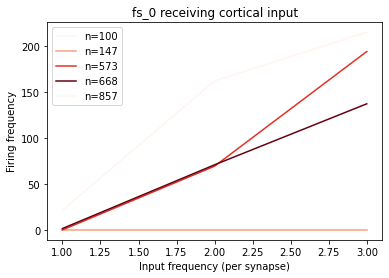

<Figure size 432x288 with 0 Axes>

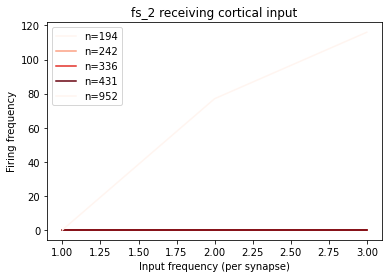

<Figure size 432x288 with 0 Axes>

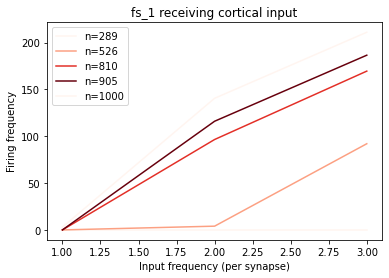

<Figure size 432x288 with 0 Axes>

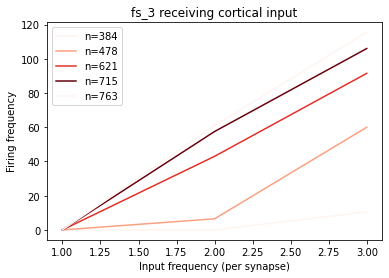

<Figure size 432x288 with 0 Axes>

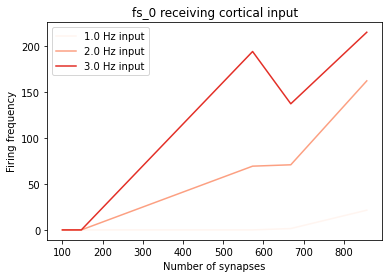

<Figure size 432x288 with 0 Axes>

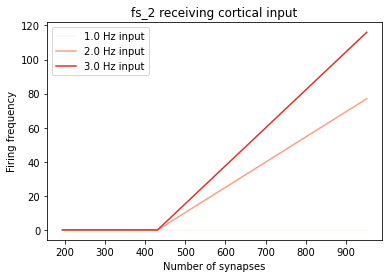

<Figure size 432x288 with 0 Axes>

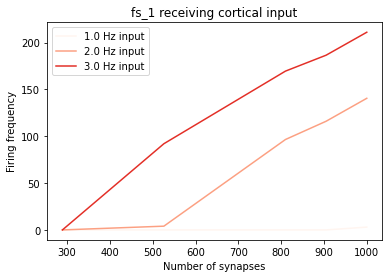

<Figure size 432x288 with 0 Axes>

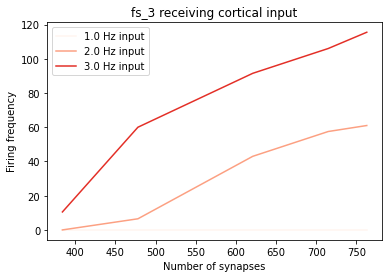

To plot traces:
python3 plotting/Network_plot_traces.py networks/input_scalingoutput_volt.txt networks/input_scalingnetwork-pruned-synapses.hdf5 


<Figure size 432x288 with 0 Axes>

In [6]:
input_scaling.analyse_results(show_plots=True)